In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import random
from time import time


In [4]:
datos1 = pd.read_csv("/content/drive/My Drive/10mo Semestre/Robótica 2/microTP/N1.csv")
datos2 = pd.read_csv("/content/drive/My Drive/10mo Semestre/Robótica 2/microTP/N2.csv")
datos4 = pd.read_csv("/content/drive/My Drive/10mo Semestre/Robótica 2/microTP/N4.csv")
datos5 = pd.read_csv("/content/drive/My Drive/10mo Semestre/Robótica 2/microTP/N5.csv")

df1 = pd.DataFrame(data=datos1, index=list(range(len(datos1))), columns=["time","angulo","aceleracion"])
df2 = pd.DataFrame(data=datos2, index=list(range(len(datos2))), columns=["time","angulo","aceleracion"])
df4 = pd.DataFrame(data=datos4, index=list(range(len(datos4))), columns=["time","angulo","aceleracion"])
df5 = pd.DataFrame(data=datos5, index=list(range(len(datos5))), columns=["time","angulo","aceleracion"])

In [8]:
########################### FUNCION SUBIR ESCALERAS #############################
def escaleras(ang, acc, ang_a, ang_d, der, der2, estado):
  if ang_d:
    if (acc>=9) and (estado == "E3"):
      estado = "E0"
    elif (estado == "E0") and (derivada<0) and (derivada2==0):    # derivada != 0
      estado = "E1"
  elif ang_a:
    if (acc< 9.8) and (estado == "E1") and (derivada>0):
      estado = "E2"
    elif (acc>=9) and (estado == "E2") and (derivada>0) and (derivada2==0):
      estado = "E3"
  else:
    estado = estado

  return estado


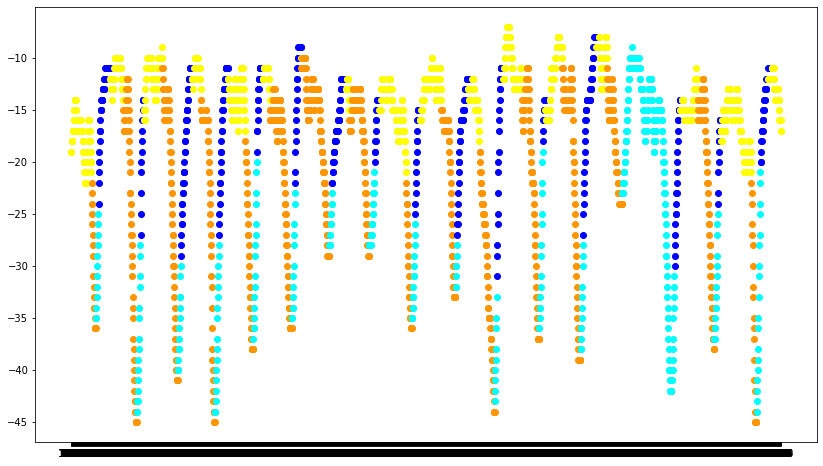

In [10]:
fig=plt.figure()
fig.set_size_inches(14, 8)
ax=fig.add_subplot(1,1,1)
df = df1
#df = df2
#df = df4
#df = df5
ang_l = []
colores = {'E0': '#FFFF00', 'E1':'#FF9600', 'E2': '#00FFFF', 'E3': '#0000FF'}
estado = "E0"
inicio = 1150
fin = 4300
for i in range(inicio, fin):
  if ((i-inicio)>=3):
    ang = df['angulo'][i]
    acc = df['aceleracion'][i]*(196/4765)
    ang_l.pop(0)
    ang_l.append(ang)

    # ang_l = [angulo_2, angulo_1, angulo]
    ang_a = (ang_l[2] > ang_l[0])
    ang_d = (ang_l[0] > ang_l[2])
  
    derivada = ((ang_l[2] - ang_l[0])) / (2*0.01) 
    derivada2 = ((ang_l[2] - 2*ang_l[1] + ang_l[0])) / (0.01*0.01)

    # Aquí se debe insertar la detecciíon de actividades (cubir escaleras, bajar escaleras, pararse, levantarse)
    estado = escaleras(ang, acc, ang_a, ang_d, derivada, derivada2, estado)

  else:
    ang = df['angulo'][i]
    ang_l.append(ang)

  color_act = colores[estado]
  plt.plot(df["time"][i],df["angulo"][i],"o", color=color_act)


plt.show()

In [6]:
v = [1, 2, 3, 6, 8]
v.pop(0)
v.append(10)
v

[2, 3, 6, 8, 10]